# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
# from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
api_key = "97df01b6453f1cd1e52e5a300c172cb2"
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =  requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint-philippe
1
Processing Record 2 of Set 1 | jiuquan
2
Processing Record 3 of Set 1 | hithadhoo
3
Processing Record 4 of Set 1 | gat
4
Processing Record 5 of Set 1 | kloulklubed
5
Processing Record 6 of Set 1 | souillac
6
Processing Record 7 of Set 1 | alofi
7
Processing Record 8 of Set 1 | juifang
City not found. Skipping...
Processing Record 9 of Set 1 | cabo san lucas
8
Processing Record 10 of Set 1 | barrow
9
Processing Record 11 of Set 1 | bambous virieux
10
Processing Record 12 of Set 1 | vaini
11
Processing Record 13 of Set 1 | katsuura
12
Processing Record 14 of Set 1 | teyateyaneng
13
Processing Record 15 of Set 1 | vestmannaeyjar
14
Processing Record 16 of Set 1 | caxito
15
Processing Record 17 of Set 1 | upington
16
Processing Record 18 of Set 1 | dingle
17
Processing Record 19 of Set 1 | balykshi
18
Processing Record 20 of Set 1 | belushya guba
City not found. Skipping...
Processin

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saint-philippe,-21.3585,55.7679,81.99,75,91,9.08,RE,1680412909
1,jiuquan,39.7432,98.5174,42.26,24,12,12.68,CN,1680412994
2,hithadhoo,-0.6000,73.0833,82.13,72,66,8.37,MV,1680412923
3,gat,31.6100,34.7642,59.81,100,0,3.20,IL,1680413001
4,kloulklubed,7.0419,134.2556,82.90,72,78,4.45,PW,1680413220


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saint-philippe,-21.3585,55.7679,81.99,75,91,9.08,RE,1680412909
1,jiuquan,39.7432,98.5174,42.26,24,12,12.68,CN,1680412994
2,hithadhoo,-0.6000,73.0833,82.13,72,66,8.37,MV,1680412923
3,gat,31.6100,34.7642,59.81,100,0,3.20,IL,1680413001
4,kloulklubed,7.0419,134.2556,82.90,72,78,4.45,PW,1680413220


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

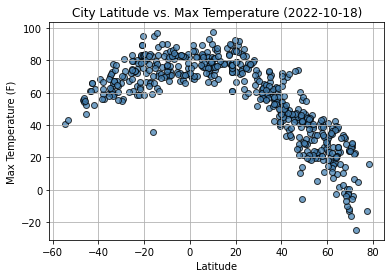

In [23]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],marker='o', c='steelblue', edgecolors='black', alpha=.75)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Latitude vs. Max Temperature (2022-10-18)')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

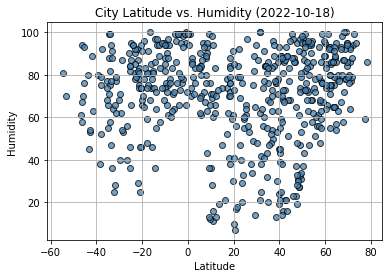

In [24]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],marker='o', c='steelblue', edgecolors='black', alpha=.75)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

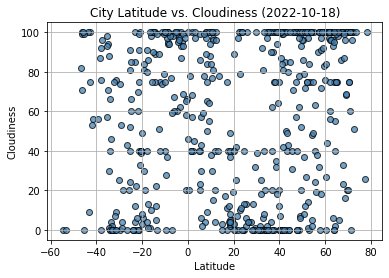

In [25]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],marker='o', c='steelblue', edgecolors='black', alpha=.75)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

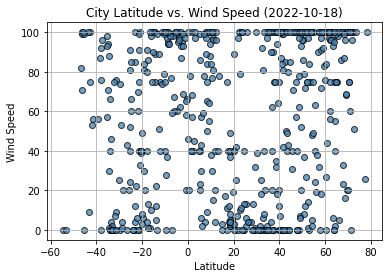

In [26]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],marker='o', c='steelblue', edgecolors='black', alpha=.75)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [47]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
# Import linregress
from scipy.stats import linregress
import textwrap

def plot_linear_regression(x, y, y_label, text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The r-value is: {r_value}")
    plt.scatter(x, y)
    plt.plot(x, regress_values, "r")
    plt.annotate(line_eq, text_coordinates,fontsize=15, color='red')
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    

In [48]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemisphere_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
# Display sample data
northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,jiuquan,39.7432,98.5174,42.26,24,12,12.68,CN,1680412994
3,gat,31.6100,34.7642,59.81,100,0,3.20,IL,1680413001
4,kloulklubed,7.0419,134.2556,82.90,72,78,4.45,PW,1680413220
7,cabo san lucas,22.8909,-109.9124,74.50,69,100,1.01,MX,1680412948
8,barrow,71.2906,-156.7887,-3.98,77,0,10.36,US,1680412907


In [49]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemisphere_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
# Display sample data
southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saint-philippe,-21.3585,55.7679,81.99,75,91,9.08,RE,1680412909
2,hithadhoo,-0.6000,73.0833,82.13,72,66,8.37,MV,1680412923
5,souillac,-20.5167,57.5167,82.78,74,40,10.36,MU,1680412946
6,alofi,-19.0595,-169.9187,80.49,78,30,12.66,NU,1680412900
9,bambous virieux,-20.3428,57.7575,83.21,74,40,10.36,MU,1680412925


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.892623990887088


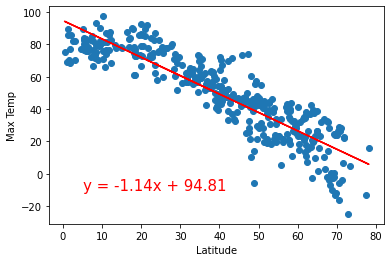

In [53]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(northern_hemisphere_df['Lat'], northern_hemisphere_df['Max Temp'],'Max Temp',(5,-10))

The r-value is: 0.6093923397989103


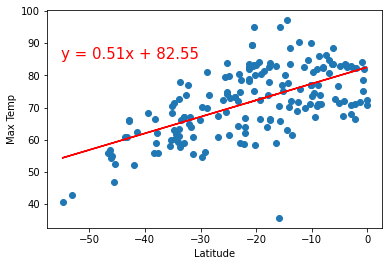

In [57]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(southern_hemisphere_df['Lat'], southern_hemisphere_df['Max Temp'],'Max Temp',(-55,85))

**Discussion about the linear relationship: The Temperature (F) vs. Latitude plot shown above of southren hemisphere, which includes data from all cities, peaks at approximately 0-degrees latitude to max temp an in the northren hemisphere it peeks in temprature at latitude value 80

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.20751157822006883


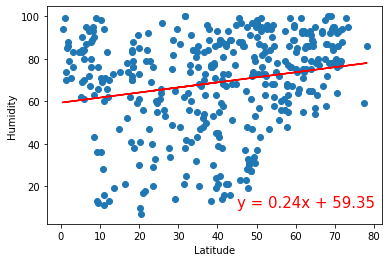

In [60]:
# Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(northern_hemisphere_df['Lat'], northern_hemisphere_df['Humidity'],'Humidity',(45,10))

The r-value is: 0.29357221441998993


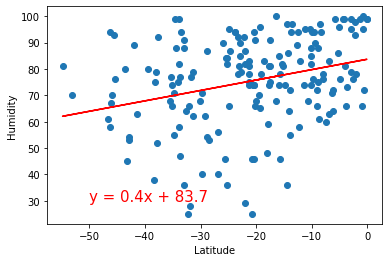

In [62]:
# Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(southern_hemisphere_df['Lat'], southern_hemisphere_df['Humidity'],'Humidity',(-50,30))

**Discussion about the linear relationship:The Humidity vs. Latitude plots shown above, which contains data from all cities, shows a relatively spread-out distribution of data points. There does not appear to be a relationship between humidity and latitude at first glance, but the humidity percentages seem to largely cluster above 50%.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2631447521025011


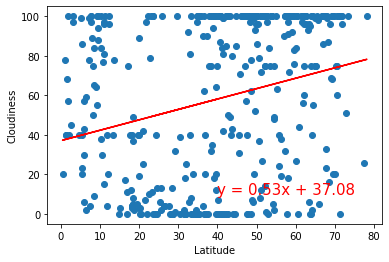

In [67]:
# Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(northern_hemisphere_df['Lat'], northern_hemisphere_df['Cloudiness'],'Cloudiness',(40,10))

The r-value is: 0.2817859220417355


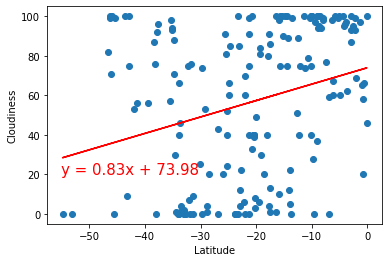

In [68]:
# Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(southern_hemisphere_df['Lat'], southern_hemisphere_df['Cloudiness'],'Cloudiness',(-55,20))

**Discussion about the linear relationship:The Cloudiness vs. Latitude plot shown above, containing data from all cities, does not seem to show a relationship between cloudiness and city latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.18211921398258307


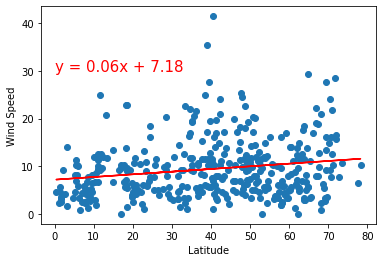

In [70]:
# Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(northern_hemisphere_df['Lat'], northern_hemisphere_df['Wind Speed'],'Wind Speed',(0,30))

The r-value is: -0.2847551738918374


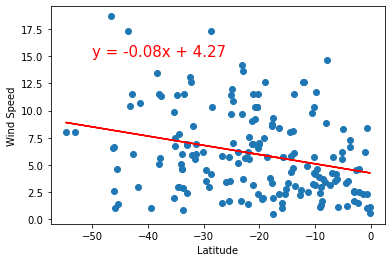

In [73]:
# Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(southern_hemisphere_df['Lat'], southern_hemisphere_df['Wind Speed'],'Wind Speed',(-50,15))

**Discussion about the linear relationship:The Wind speed vs. Latitude plot, shown above for all cities, does not seem to show any relationship between wind speed and latitude. 